In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [21]:
data = pd.read_table("201028_GSE122505_Leukemia_clean.txt")
data

,DDR1,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,UBA7,THRA,PTPN21,...,LOC100129924,FAM86B1,FAM86B2,FAM86DP,FAM86FP,SNHG17,LOC100505915,GSM,disease,FAB
0,7.135135,7.135135,6.482099,6.676021,6.645632,6.382956,9.792603,9.792603,6.519152,5.807912,...,5.566997,7.410738,7.410738,7.410738,7.410738,7.482258,5.944763,1,AML,M2
1,7.379455,7.379455,6.824016,6.575389,6.866953,5.777188,9.868853,9.868853,6.739256,5.394392,...,6.389914,7.684605,7.684605,7.684605,7.684605,7.800407,6.344267,2,AML,M4
2,7.776574,7.776574,6.777692,6.833048,6.740570,5.758784,9.503343,9.503343,6.585977,5.269234,...,6.359589,7.432409,7.432409,7.432409,7.432409,7.514223,6.742695,3,AML,M2
3,7.610568,7.610568,6.876088,6.331511,6.806035,5.697665,10.752530,10.752530,6.454185,5.232170,...,6.214732,7.004306,7.004306,7.004306,7.004306,8.008685,6.567193,4,AML,M2
4,7.734832,7.734832,7.227384,6.647835,6.610387,5.643476,10.536639,10.536639,6.391109,5.396083,...,6.360325,7.707046,7.707046,7.707046,7.707046,7.715277,6.274365,5,AML,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,7.038301,7.038301,6.850005,7.901066,6.346733,5.267717,7.767640,7.767640,6.419903,5.186932,...,6.376156,6.644048,6.644048,6.644048,6.644048,7.711407,5.770466,2375,AML,M1
2375,7.345443,7.345443,6.636042,6.879693,6.672030,6.021948,8.308662,8.308662,6.669993,5.549938,...,6.243571,7.027639,7.027639,7.027639,7.027639,7.192586,6.124443,2376,AML,unknown
2376,6.712769,6.712769,6.383325,6.440957,6.420609,5.559144,8.105112,8.105112,6.381601,5.335782,...,6.473089,6.537953,6.537953,6.537953,6.537953,7.530842,5.957701,2377,AML,M6
2377,6.773485,6.773485,6.665699,6.688221,6.425495,5.712962,7.996249,7.996249,6.493025,5.208735,...,6.118339,6.716129,6.716129,6.716129,6.716129,7.172273,5.952782,2378,AML,unknown


In [22]:
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

In [23]:
data["disease"] = data["disease"].replace({"Diabetes_Type_I": "Diabetes", "Diabetes_Type_II": "Diabetes"})
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data["disease"].isin(other)]

In [24]:
data.disease.value_counts()

AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

In [35]:
data.shape
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape
target.value_counts()

/var/folders/_5/577czd8n0h98rgb9kmt_kh2c0000gn/T/ipykernel_13778/3476264439.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = data.drop("disease", 1)
/var/folders/_5/577czd8n0h98rgb9kmt_kh2c0000gn/T/ipykernel_13778/3476264439.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("GSM", 1)
/var/folders/_5/577czd8n0h98rgb9kmt_kh2c0000gn/T/ipykernel_13778/3476264439.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("FAB", 1)


AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

In [47]:
# Filtering Out Low Variant Features

df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape

(2321, 4311)

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Perform PCA, keeping the first 50 components
pca = PCA(n_components=50)
X = pca.fit_transform(df)

# Encode the target labels
le = LabelEncoder()
y_lan = le.fit_transform(target)

# Create a DataFrame for the first two PCA components
pca_df = pd.DataFrame({
    "PCA1": X[:, 0],
    "PCA2": X[:, 1],
    "Disease": target,
    "label": y_lan
})

In [77]:
pca_df

,PCA1,PCA2,Disease,label
0,-22.581082,3.539789,AML,2
1,-15.957947,4.013070,AML,2
2,-5.923637,11.271702,AML,2
3,1.033231,12.100938,AML,2
4,9.260130,17.239219,AML,2
...,...,...,...,...
2374,29.892079,-9.245461,AML,2
2375,-0.820563,-24.697387,AML,2
2376,28.253849,-8.306102,AML,2
2377,29.266459,-16.556852,AML,2


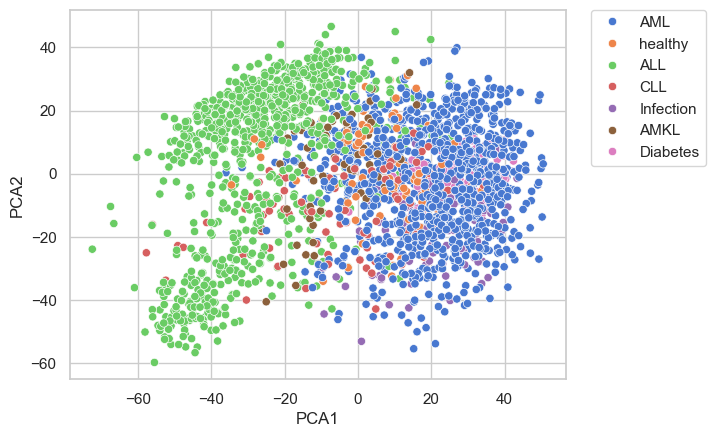

In [94]:
sns.set(style= "whitegrid", palette= "muted")
#sns.set_theme(style=”whitegrid”)
ax = sns.scatterplot(x= "PCA1", y="PCA2", hue= "Disease", data= pca_df)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.savefig(“GSE122505_Leukemia_PCA.pdf”, dpi = 300)
#plt.savefig(“GSE122505_Leukemia_PCA.png”)
#pca_df.to_csv(“GSE122505_Leukemia_PCA.csv”)

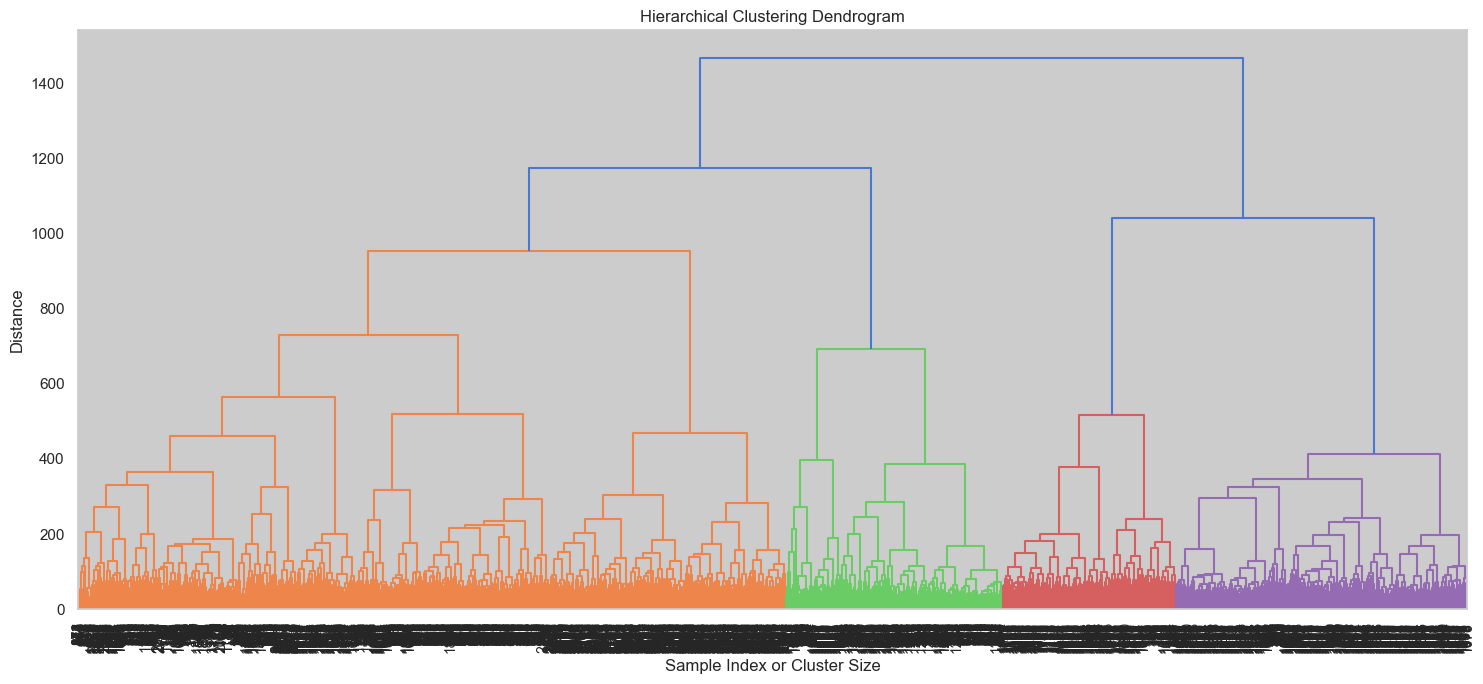

In [98]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
linked = sch.linkage(df, method='ward')

# Plot the dendrogram with improved settings
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_rotation=90,  
    leaf_font_size=10  
)

# Display the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.tight_layout() 
plt.show()


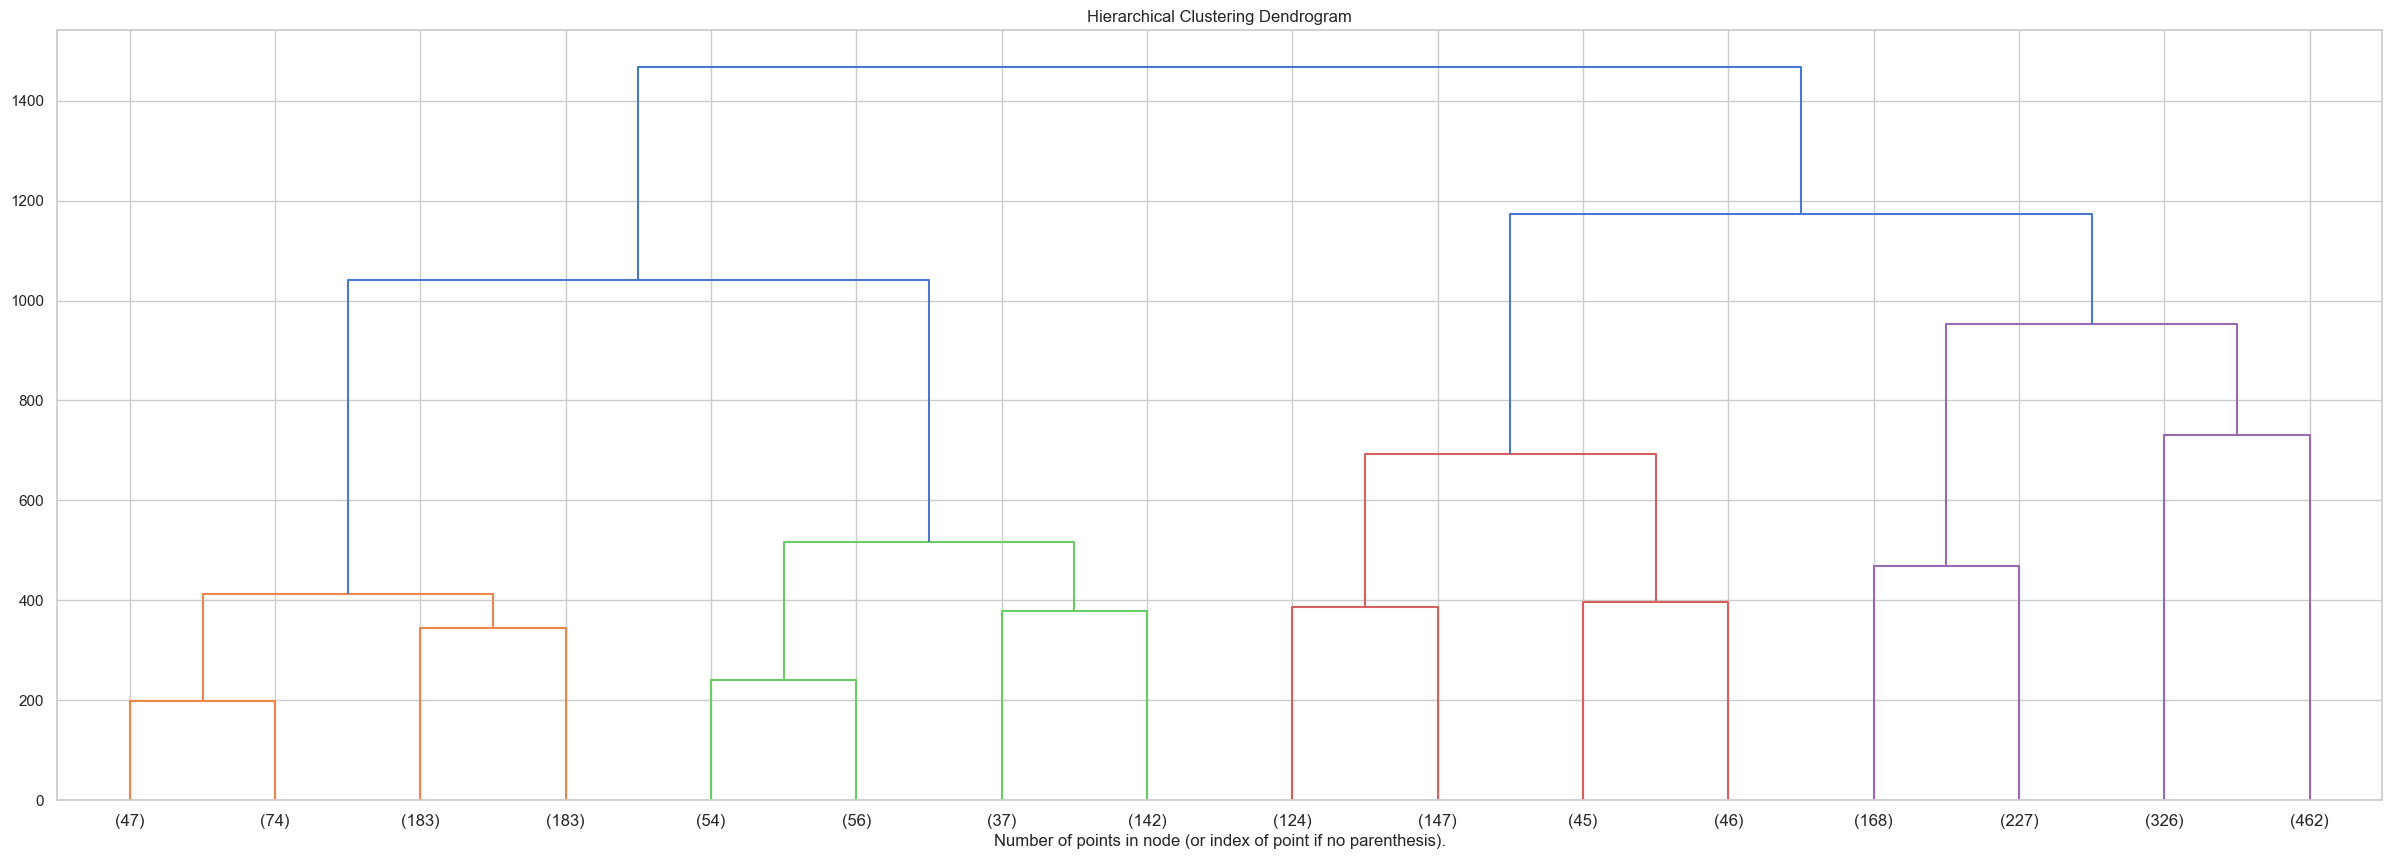

In [118]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    # Create the linkage matrix
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Setting distance_threshold=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df)

plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')

# Plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

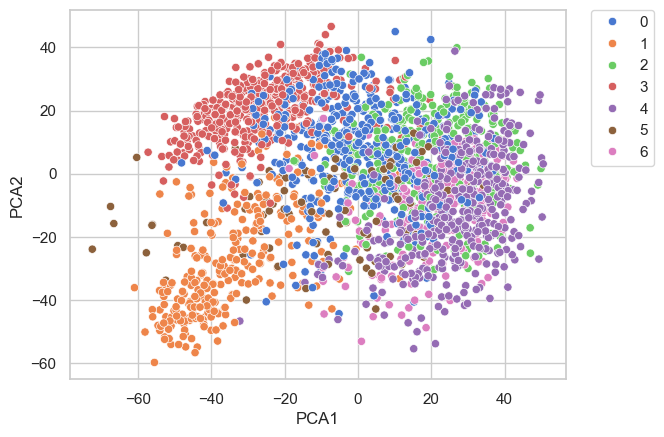

In [120]:
pca_df["HC_labels"] = cluster.labels_
pca_df['HC_labels'] = pca_df.HC_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
#sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="HC_labels",  data=pca_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_HC.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_HC.png")
#pca_df.to_csv("GSE122505_Leukemia_HC.csv")

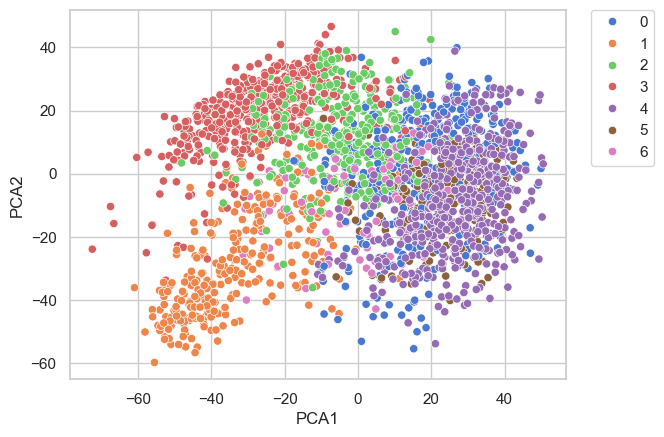

In [124]:
# Alternative method - faster computation time


#compute PCA
pca = PCA(n_components=50)
X = pca.fit(df).transform(df)

#conduct hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=7, linkage='ward')
cluster.fit_predict(X)

#plot the labels
pca_df["HC_PCA_labels"] = cluster.labels_
pca_df['HC_PCA_labels'] = pca_df.HC_PCA_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="HC_PCA_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save
#plt.savefig("GSE122505_Leukemia_HC_PCA.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_HC_PCA.png")
#pca_df.to_csv("GSE122505_Leukemia_HC_PCA.csv")

/Users/ananya/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/ananya/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


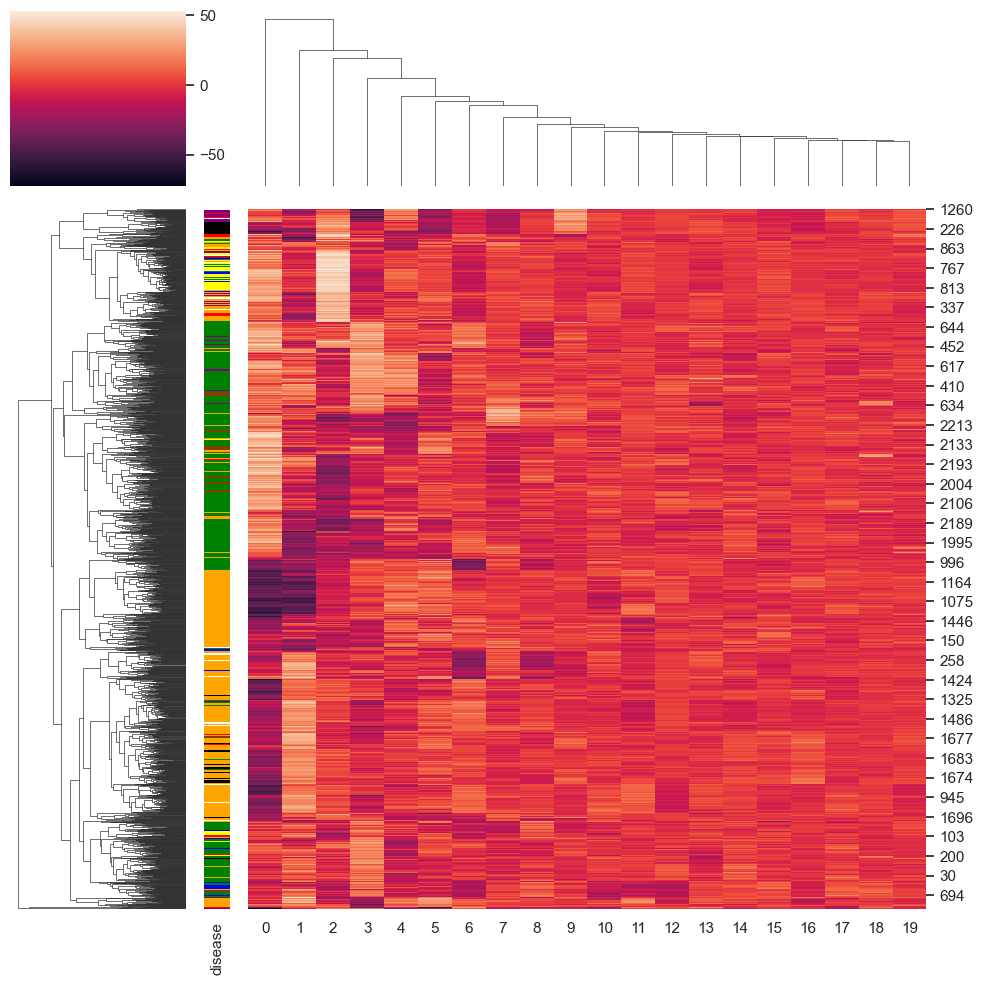

In [129]:
#Generate heatmap

sns.set_theme(color_codes=True)
pca = PCA(n_components=20)
Y = pca.fit(df).transform(df)
Y = pd.DataFrame(Y)
k = ["green", "red", "orange", "black", "purple", "blue", "yellow"]
lut = dict(zip(target.unique(), k))
row_colors = target.map(lut)
g = sns.clustermap(Y, row_colors=row_colors)

plt.tight_layout()

# k-means

In [132]:
!pip install kneed

#import required libraries
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(init="random", n_clusters=7, n_init=10, max_iter=300, random_state=42)
kmeans.fit_predict(df)

array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

In [134]:
# The lowest SSE value
kmeans.inertia_

6510529.452940758

In [136]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-8.69113148e-01, -8.69113148e-01, -3.49537162e-01, ...,
        -6.59123846e-01, -1.05671005e-01,  1.77851051e+00],
       [ 2.99240643e-01,  2.99240643e-01,  8.70830826e-02, ...,
         2.17873983e-01, -1.12513008e-01,  7.48856230e-04],
       [-5.37069373e-01, -5.37069373e-01,  1.32989522e+00, ...,
         6.40124090e-01, -4.83613018e-01,  1.50115187e-02],
       ...,
       [ 1.02228139e+00,  1.02228139e+00, -4.70044116e-01, ...,
        -3.61632803e-01, -4.98788735e-01, -2.21767291e-03],
       [-6.86308787e-01, -6.86308787e-01,  2.16027984e-02, ...,
         3.25151235e-01,  4.55947073e-01, -9.72995496e-01],
       [ 7.99668403e-01,  7.99668403e-01, -1.40545313e-02, ...,
         7.42455440e-01,  9.47641896e-01,  6.79853694e-02]])

In [138]:
# The number of iterations required to converge
kmeans.n_iter_

22

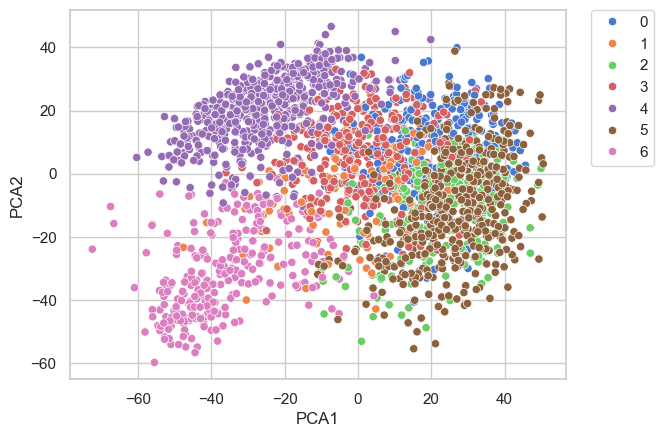

In [140]:
pca_df["kmeans_labels"] = kmeans.labels_
pca_df['kmeans_labels'] = pca_df.kmeans_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="kmeans_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save it
#plt.savefig("GSE122505_Leukemia_kmeans.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_kmeans.png")
#pca_df.to_csv("GSE122505_Leukemia_kmeans.csv")

In [142]:
#elbow method

kmeans_kwargs = { "init": "random",  "n_init": 10, "max_iter": 300, "random_state": 42}
sse = [] #our list
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df)
   sse.append(kmeans.inertia_)


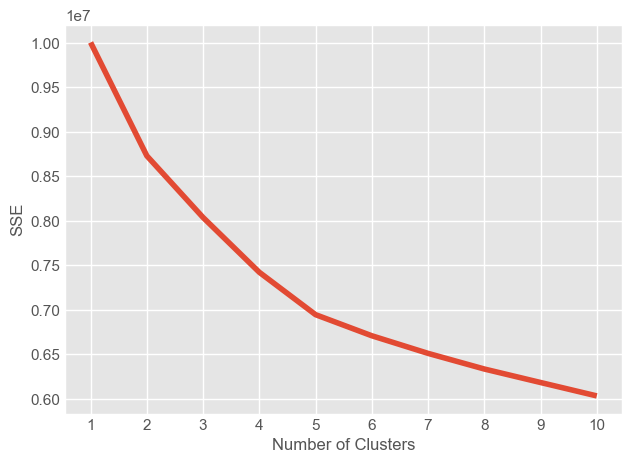

In [158]:
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
#plt.tightlayout()
plt.show()

In [160]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

5

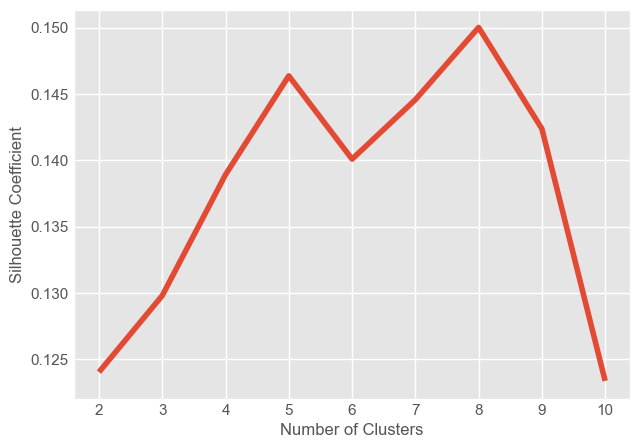

In [167]:
# Silhouette method

# A list containing all the average silhouette coffecient for each K
silhouette_coefficients = []
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df)
   score = silhouette_score(df, kmeans.labels_)
   silhouette_coefficients.append(score)
plt.style.use("ggplot")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


# DBSCAN 

In [175]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN()

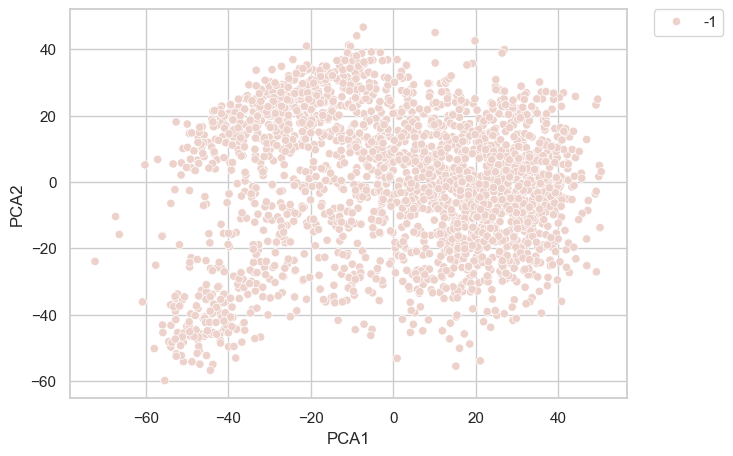

In [177]:
pca_df["dbscan_labels"] = dbscan.labels_
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="dbscan_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save it
#plt.savefig("GSE122505_Leukemia_kmeans.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_kmeans.png")
#pca_df.to_csv("GSE122505_Leukemia_kmeans.csv")

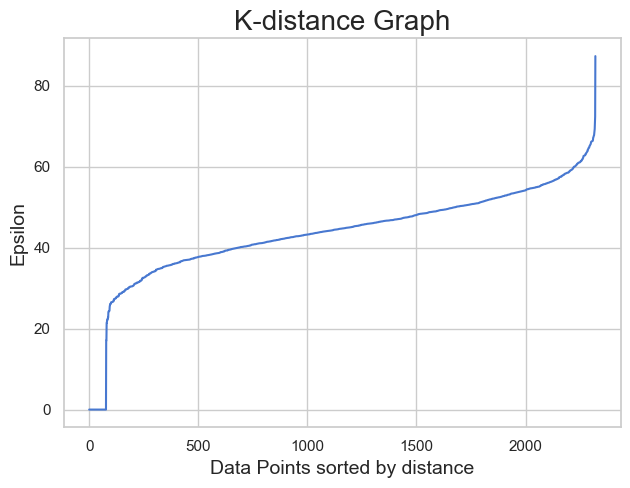

In [179]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [181]:
kl = KneeLocator(distances[1000:len(distances)], range(1000, len(distances)), curve="convex", direction="decreasing")
kl.elbow

43.28211693010416

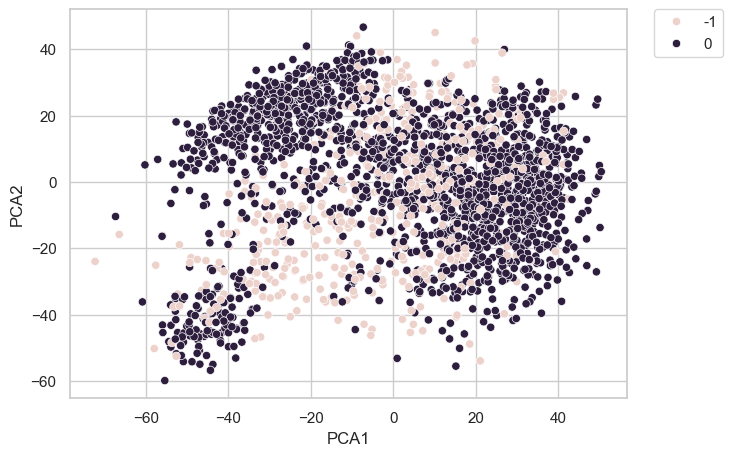

In [185]:
dbscan=DBSCAN(eps=60,min_samples=50)
dbscan.fit(df)
pca_df["dbscan_labels"] = dbscan.labels_
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="dbscan_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


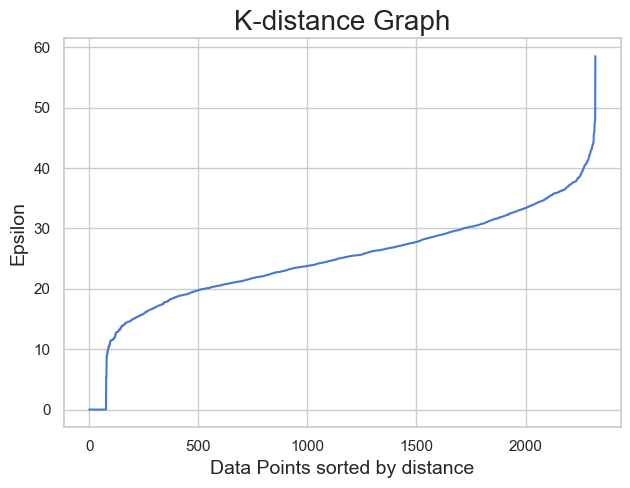

In [187]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

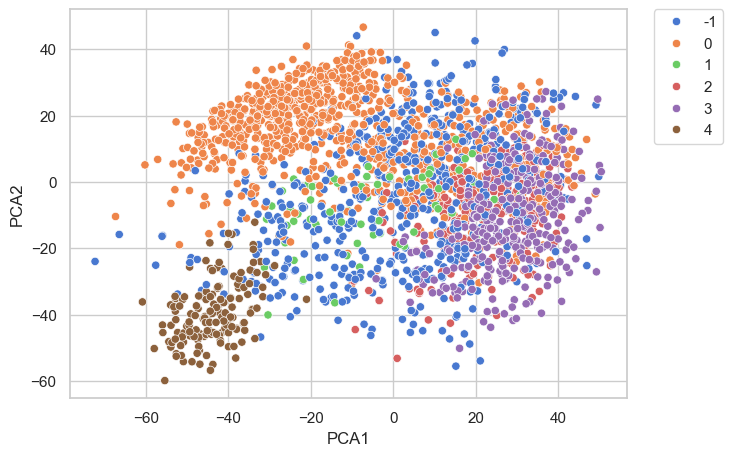

In [189]:
dbscan=DBSCAN(eps=40,min_samples=30)
dbscan.fit(X)
pca_df["dbscan_labels"] = dbscan.labels_
pca_df['dbscan_labels'] = pca_df.dbscan_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="dbscan_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/Users/ananya/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/ananya/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


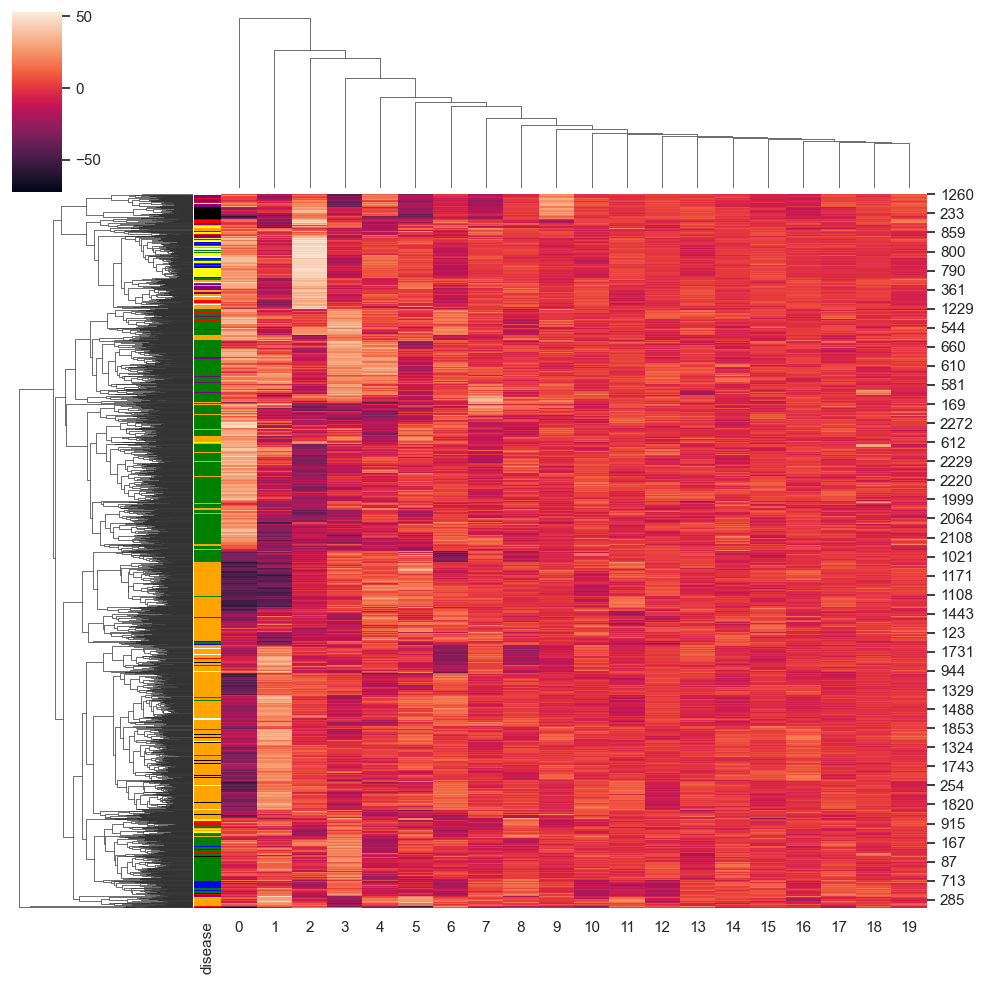

In [191]:
import seaborn as sns; sns.set_theme(color_codes=True)
#pca = PCA(n_components=20)
#Y = pca.fit(df).transform(df)
#Y = pd.DataFrame(Y)
k = ["green", "red", "orange", "black", "purple", "blue", "yellow"]
lut = dict(zip(target.unique(), k))
row_colors = target.map(lut)

g = sns.clustermap(Y, row_colors=row_colors)

# Gaussian Mixture Models

In [196]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)
gmm.fit(X)

GaussianMixture(n_components=7)

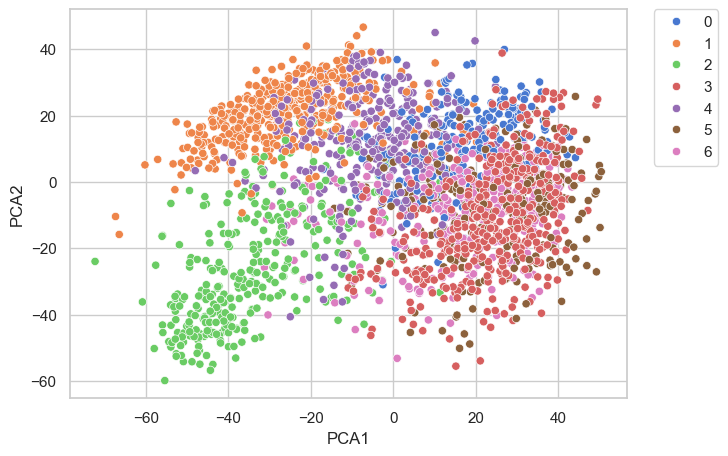

In [198]:
pca_df["GMM_labels"] = gmm.predict(X)
pca_df['GMM_labels'] = pca_df.GMM_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="GMM_labels",  data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

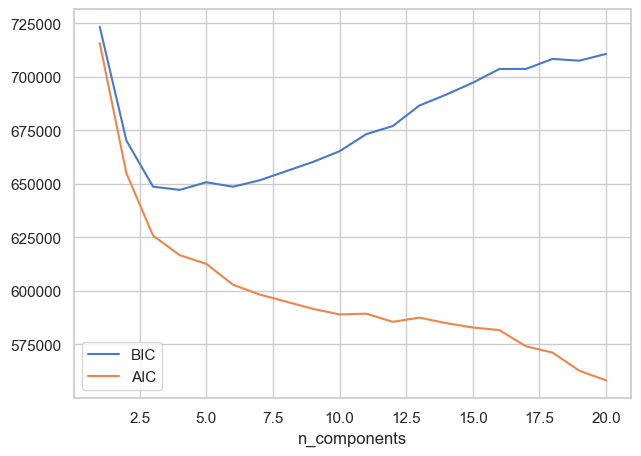

In [200]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [201]:
new_data = gmm.sample(1000)
gmm_components = new_data[:][0]
gmm_new_labels = new_data[:][1]
gmm_components.shape


(1000, 50)

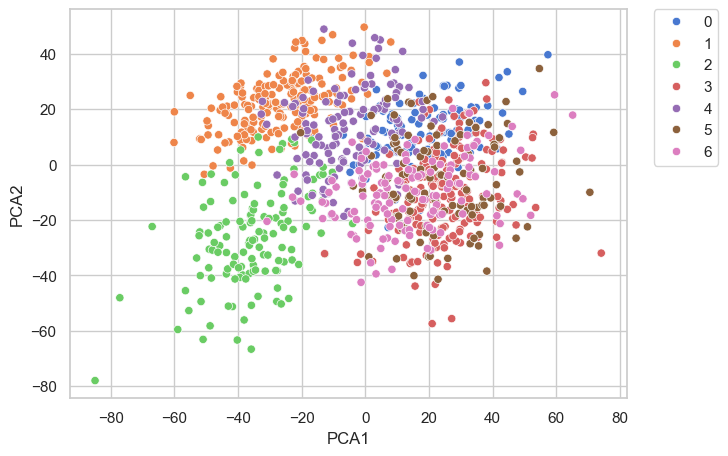

In [202]:
new_df = pd.DataFrame(columns = ["x", "y", "gmm_new_labels"])
new_df["PCA1"] = gmm_components[:, 0]
new_df["PCA2"] = gmm_components[:, 1]
new_df["gmm_new_labels"] = gmm_new_labels

new_df['gmm_new_labels'] = new_df.gmm_new_labels.astype('category')
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="gmm_new_labels",  data=new_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)